In [3]:
#Step 1: Load and Inspect Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('Salary_Data.csv')

# Display basic info
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
#Step 2: Dataset Attributes
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (375, 6)

Column Names: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

Data Types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Missing Values:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [5]:
#Step 3: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop missing values (or handle accordingly)
df.dropna(inplace=True)

# Encode categorical features
label_encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_classification(y_true, y_pred, model_name):
    bins = [0, 50000, 100000, np.inf]
    labels = [0, 1, 2]
    y_true_binned = pd.cut(y_true, bins=bins, labels=labels)
    y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

    print(f"\n Classification Report for {model_name}")
    print(classification_report(y_true_binned, y_pred_binned, target_names=["Low", "Medium", "High"]))

    cm = confusion_matrix(y_true_binned, y_pred_binned)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


M3: Random Forest
R² Score: 0.9400791677723634

 Classification Report for Random Forest
              precision    recall  f1-score   support

         Low       0.93      0.72      0.81        18
      Medium       0.70      0.70      0.70        23
        High       0.84      0.94      0.89        34

    accuracy                           0.81        75
   macro avg       0.82      0.79      0.80        75
weighted avg       0.82      0.81      0.81        75



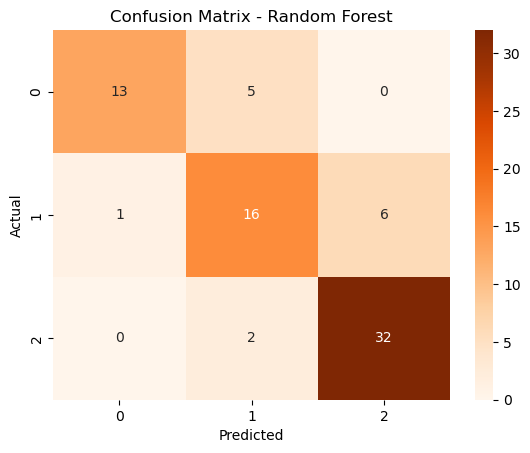

In [7]:
#Step 4: Main Model - RANDOM FOREST
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("M3: Random Forest")
print("R² Score:", r2_score(y_test, y_pred_rf))

evaluate_classification(y_test, y_pred_rf, "Random Forest")


In [8]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 8529.457666666665
MSE: 143665122.08974168
R² Score: 0.9400791677723634


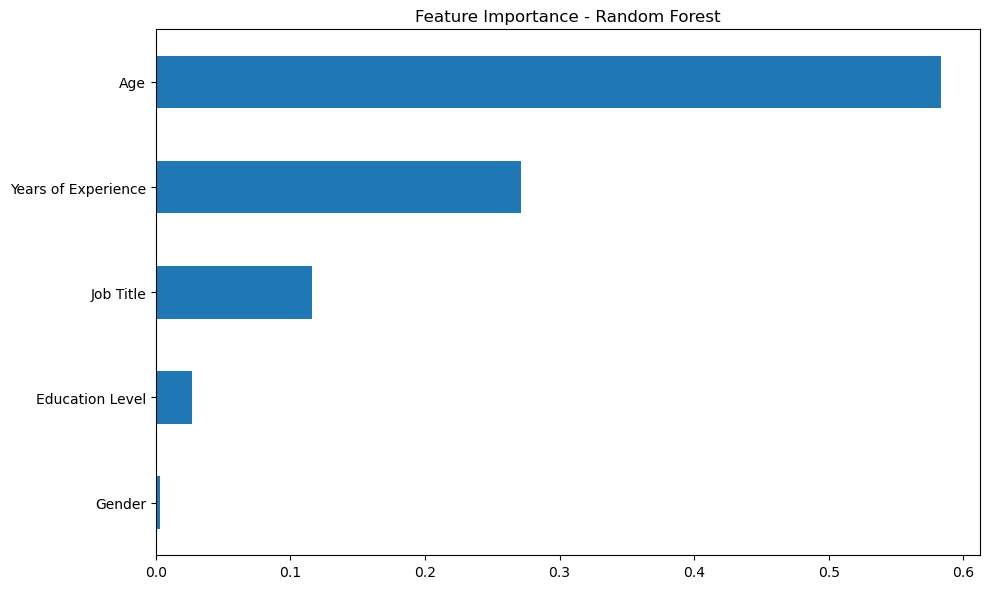

In [9]:
plt.figure(figsize=(10, 6))
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [10]:
!pip install xgboost


In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Initial model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(xgb, params, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [12]:
y_pred = best_xgb.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 8870.87
MSE: 185377698.84
R² Score: 0.92


              precision    recall  f1-score   support

         Low       0.86      0.67      0.75        18
      Medium       0.67      0.70      0.68        23
        High       0.86      0.94      0.90        34

    accuracy                           0.80        75
   macro avg       0.80      0.77      0.78        75
weighted avg       0.80      0.80      0.80        75



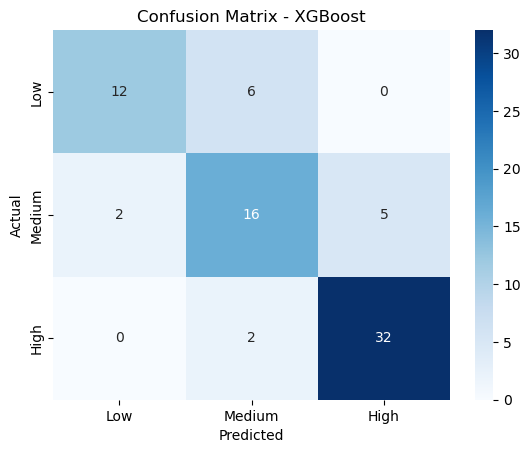

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Bin salary into 3 categories: Low, Medium, High
bins = [0, 50000, 100000, np.inf]
labels = [0, 1, 2]  # low, medium, high
y_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

# Evaluation metrics
print(classification_report(y_binned, y_pred_binned, target_names=['Low', 'Medium', 'High']))

# Confusion Matrix
cm = confusion_matrix(y_binned, y_pred_binned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


M2: Linear Regression
R² Score: 0.8961138207821866

 Classification Report for Linear Regression
              precision    recall  f1-score   support

         Low       0.92      0.67      0.77        18
      Medium       0.65      0.74      0.69        23
        High       0.86      0.91      0.89        34

    accuracy                           0.80        75
   macro avg       0.81      0.77      0.78        75
weighted avg       0.81      0.80      0.80        75



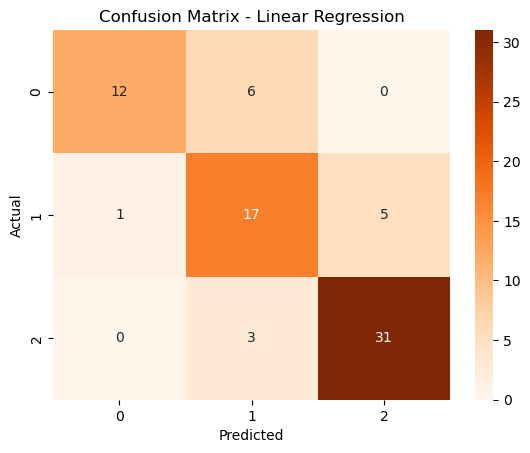

In [14]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("M2: Linear Regression")
print("R² Score:", r2_score(y_test, y_pred_lr))

evaluate_classification(y_test, y_pred_lr, "Linear Regression")


M4: Support Vector Regressor
R² Score: 0.09981025208004168

 Classification Report for Support Vector Regressor
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        18
      Medium       0.31      1.00      0.47        23
        High       0.00      0.00      0.00        34

    accuracy                           0.31        75
   macro avg       0.10      0.33      0.16        75
weighted avg       0.09      0.31      0.14        75



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


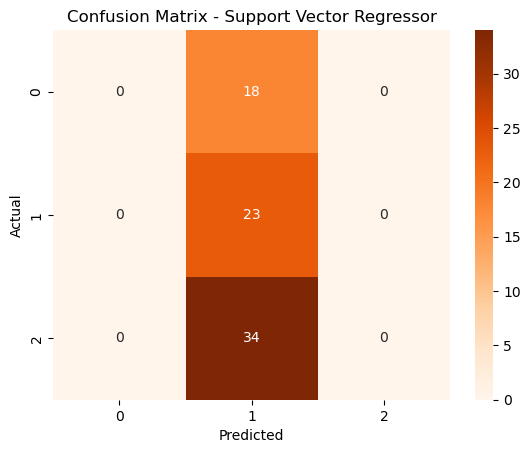

In [15]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("M4: Support Vector Regressor")
print("R² Score:", r2_score(y_test, y_pred_svr))

evaluate_classification(y_test, y_pred_svr, "Support Vector Regressor")


In [16]:
!pip install tensorflow


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
M5: Deep Neural Network
R² Score: 0.6625145549808898

 Classification Report for Deep Neural Network
              precision    recall  f1-score   support

         Low       0.72      0.72      0.72        18
      Medium       0.52      0.70      0.59        23
        High       0.92      0.71      0.80        34

    accuracy                           0.71        75
   macro avg       0.72      0.71      0.70        75
weighted avg       0.75      0.71      0.72        75



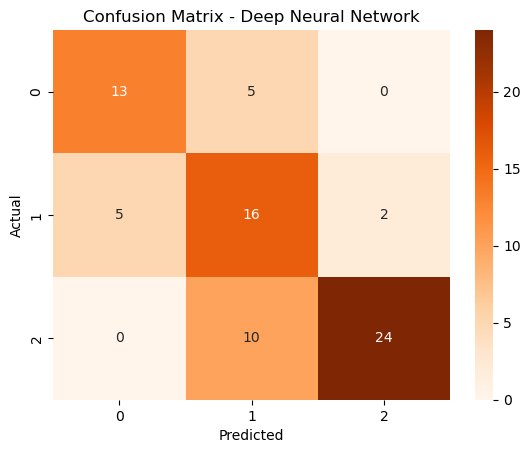

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
dnn = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Predict
y_pred_dnn = dnn.predict(X_test).flatten()

print("M5: Deep Neural Network")
print("R² Score:", r2_score(y_test, y_pred_dnn))

evaluate_classification(y_test, y_pred_dnn, "Deep Neural Network")


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

models = {
    "XGBoost": best_xgb.predict(X_test),
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVR": y_pred_svr,
    "DNN": y_pred_dnn
}

# Step 1: Collect results in a list of dicts
results = []

for name, preds in models.items():
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "R2": r2})

# Step 2: Create DataFrame from results
comparison_df = pd.DataFrame(results)

# Step 3: Display
print("\n Regression Comparison Table:")
print(comparison_df.sort_values("R2", ascending=False))



 Regression Comparison Table:
               Model           MAE           MSE        R2
2      Random Forest   8529.457667  1.436651e+08  0.940079
0            XGBoost   8870.868594  1.853777e+08  0.922681
1  Linear Regression  10928.921486  2.490757e+08  0.896114
4                DNN  22617.988828  8.091491e+08  0.662515
3                SVR  37513.258132  2.158279e+09  0.099810


In [19]:
import joblib
rf_model.fit(X_train, y_train)
best_model = rf_model
joblib.dump(best_model, "salary_predictor.pkl")





['salary_predictor.pkl']

In [20]:
!pip install gradio


In [21]:
import gradio as gr
import pandas as pd
import joblib
import numpy as np

# Load your trained model
model = joblib.load("salary_predictor.pkl")

# Encoders used during training
gender_map = {'Male': 0, 'Female': 1}
edu_map = {"Bachelor's": 0, "Master's": 1, "PhD": 2}
job_map = {
    'Software Engineer': 0,
    'Data Analyst': 1,
    'Senior Manager': 2,
    'Sales Associate': 3,
    'Director': 4
}

# Exchange rates
exchange_rates = {
    'USD': 1.0,
    'INR': 83.2,
    'EUR': 0.91,
    'GBP': 0.78,
    'JPY': 157.3
}

symbol_map = {
    'USD': '$',
    'INR': '₹',
    'EUR': '€',
    'GBP': '£',
    'JPY': '¥'
}

# Prediction function
def predict_salary(age, gender, education, job, experience, currency):
    # Encode categorical inputs
    gender_enc = gender_map[gender]
    edu_enc = edu_map[education]
    job_enc = job_map[job]
    input_data = np.array([[age, gender_enc, edu_enc, job_enc, experience]])

    # Predict in USD
    annual_usd = model.predict(input_data)[0]

    # Convert to selected currency
    rate = exchange_rates.get(currency, 1.0)
    annual_converted = annual_usd * rate
    monthly_converted = annual_converted / 12

    symbol = symbol_map.get(currency, '$')

    return f"Predicted Annual Salary: {symbol}{annual_converted:,.2f} ({currency})\nPredicted Monthly Salary: {symbol}{monthly_converted:,.2f} ({currency})"

# Gradio Interface
demo = gr.Interface(
    fn=predict_salary,
    inputs=[
        gr.Slider(18, 65, step=1, label="Age"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Dropdown(["Bachelor's", "Master's", "PhD"], label="Education Level"),
        gr.Dropdown(['Software Engineer', 'Data Analyst', 'Senior Manager', 'Sales Associate', 'Director'], label="Job Title"),
        gr.Slider(0, 40, step=1, label="Years of Experience"),
        gr.Dropdown(['USD', 'INR', 'EUR', 'GBP', 'JPY'], label="Preferred Currency")
    ],
    outputs="text",
    title="Employee Salary Prediction",
    description="Predict salary based on your details and view annual and monthly salary in your preferred currency."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
